<a href="https://colab.research.google.com/github/ShivajiMallela/Deep-Learning-projects/blob/main/0_Predicting_Happiness_and_Sadness_Using_Convolutional_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Happy or Sad? A Convolutional Neural Network Approach to Emotion Prediction

This project aims to develop a Convolutional Neural Network (CNN) to predict human emotions, specifically happiness and sadness, from facial images. The steps involved in the project are as follows:

1. Data Collection: Creating dataset by collecting images from Google.

2. Data Preprocessing: Cleaning and preprocess the images to ensure consistency. This includes resizing images, normalizing pixel values, and augmenting the data to increase diversity and improve model robustness.

3. CNN Architecture Design: Design a CNN model architecture tailored for emotion recognition. This includes defining layers such as convolutional layers, pooling layers, and fully connected layers.

4. Model Training: Train the CNN model using the preprocessed dataset. This involves splitting the data into training and validation sets, defining a loss function, and optimizing the model using techniques like backpropagation and gradient descent.

5. Evaluation: Evaluate the trained model's performance using metrics as accuracy.

5. Fine-Tuning: Fine-tune the model by adjusting hyperparameters and experimenting with different architectures to improve accuracy and generalization.

### Import necessary libraries

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import os
%matplotlib inline

Getting GPU

To connect to a GPU in Google Colab

1. Click on "Runtime" in the menu.
2. Select "Change runtime type."
3. In the pop-up window, change the "Hardware accelerator" to "GPU."
4. Click "Save."

Run the following code in a code cell to check if the GPU is available:

In [2]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

If We've got access to a GPU, the cell above should output something like:

`[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]`


Mount Drive

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import cv2
import imghdr

# Get the data

For this project I'm going to download images of people who are Happy and Sad from [Google](https://images.google.com/).

In [5]:
# Data directory
data_dir = 'drive/MyDrive/Data/'

In [6]:
# Function to rename files in a folder
def rename_images(folder_path, prefix):
    file_list = os.listdir(folder_path)
    for i, filename in enumerate(file_list):
        # Get the file extension
        file_extension = os.path.splitext(filename)[1]

        # Construct the new name
        new_name = f"{prefix} {i + 1}{file_extension}"

        # Construct the full file paths
        old_file = os.path.join(folder_path, filename)
        new_file = os.path.join(folder_path, new_name)

        # Rename the file
        os.rename(old_file, new_file)
    print(f"All files in {folder_path} have been renamed.")

#Define the paths to your folders
happy_folder_path = '/content/drive/MyDrive/Data/Happy'
sad_folder_path = '/content/drive/MyDrive/Data/Sad'

#Rename the images in each folder
rename_images(happy_folder_path, "happy")
rename_images(sad_folder_path, "sad")

All files in /content/drive/MyDrive/Data/Happy have been renamed.
All files in /content/drive/MyDrive/Data/Sad have been renamed.


In [7]:
# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk(data_dir):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'")

There are 4 directories and 0 images in 'drive/MyDrive/Data/'
There are 0 directories and 319 images in 'drive/MyDrive/Data/Happy'
There are 0 directories and 292 images in 'drive/MyDrive/Data/Sad'
There are 0 directories and 5 images in 'drive/MyDrive/Data/images'
There are 0 directories and 0 images in 'drive/MyDrive/Data/.ipynb_checkpoints'


In [8]:
# Get the class names
class_names = [name for name in os.listdir(data_dir)]
class_names

['Happy', 'Sad', 'images', '.ipynb_checkpoints']

In [9]:
# Predefining the image extensions
image_exts = ['jpg','jpeg','bmp','png']
image_exts

['jpg', 'jpeg', 'bmp', 'png']

## Remove unwanted or noisy images.

In [10]:
# Function to verify image extension
def is_valid_image(image_path):
    # Check file extension
    ext = os.path.splitext(image_path)[1][1:].lower()  # Get the extension and convert to lower case
    if ext not in image_exts:
        return False

    # Check image content using imghdr.what
    tip = imghdr.what(image_path)
    if tip is None:
        return False

    # Verify file content
    img = cv2.imread(image_path)
    if img is None:
        return False
    return True

# Iterate through each class directory
for image_class in os.listdir(data_dir):
    class_dir = os.path.join(data_dir, image_class)
    if not os.path.isdir(class_dir):
        continue  # Skip if not a directory

    # Iterate through each image in the class directory
    for image in os.listdir(class_dir):
        image_path = os.path.join(class_dir, image)

        # Check if the image is valid
        if not is_valid_image(image_path):
            print(f"Removing invalid image: {image_path}")
            os.remove(image_path)

print("Image validation and cleaning complete.")

Image validation and cleaning complete.


In [11]:
# Get the length of "happy" folder
len(os.listdir(happy_folder_path))

319

In [12]:
# Get the length of "sad" folder
len(os.listdir(sad_folder_path))

292

## Visualize the data

In [13]:
import matplotlib.image as mpimg
import random

# Function to display random image
def view_random_image(target_dir, target_class):

  # target folder to get images from
  target_folder = target_dir+target_class

  # select a random image from target folder
  random_image = random.sample(os.listdir(target_folder), 1)

  # print selected image
  print(random_image)

  # Read the image and plot it.
  img = mpimg.imread(os.path.join(target_folder,random_image[0]))
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off')

  print(f"Image shape: {img.shape}") #shape of the image

  return img;

['happy 436.jpg']
Image shape: (745, 500, 3)


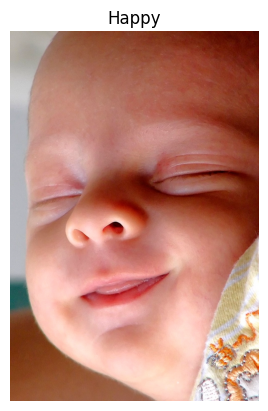

In [ ]:
# view an image from "Happy" class
img = view_random_image('drive/MyDrive/Data/', "Happy")

['sad 63.jpg']
Image shape: (408, 612, 3)


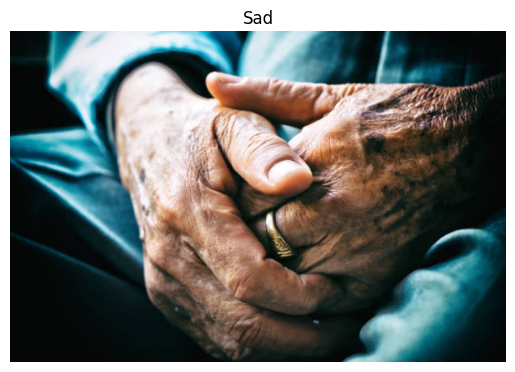

In [ ]:
# view an image from "Sad" class
img = view_random_image('drive/MyDrive/Data/', "Sad")

# Preprocess the data

## Split data into training and testing

We going to split 80% of our data into training set and 20% into test set.

In [14]:
# total length of happy folder
total_happy = len(os.listdir(happy_folder_path))

# 80% of the happy folder
happy_80 = int(len(os.listdir(happy_folder_path))*0.8)

# 20% of the happy folder
happy_20 = len(os.listdir(happy_folder_path)) - happy_80

# display the length
print(f"There are total {total_happy} images in the 'happy' folder, 80% of it is '{happy_80}' and 20% of it is '{happy_20}'.")

There are total 319 images in the 'happy' folder, 80% of it is '255' and 20% of it is '64'.


In [15]:
# total length of sad folder
total_sad = len(os.listdir(sad_folder_path))

# 80% of the sad folder
sad_80 = int(len(os.listdir(sad_folder_path))*0.8)

# 20% of the sad folder
sad_20 = len(os.listdir(sad_folder_path)) - sad_80

# display the length
print(f"There are total {total_sad} images in the 'sad' folder, 80% of it is '{sad_80}' and 20% of it is '{sad_20}'.")

There are total 292 images in the 'sad' folder, 80% of it is '233' and 20% of it is '59'.


## Create train and test dataframes

In [16]:
# Collect file paths and labels
train_files = []
train_labels = []

for file in os.listdir(happy_folder_path)[:happy_80]:
    train_files.append(os.path.join(happy_folder_path, file))
    train_labels.append('happy')

for file in os.listdir(sad_folder_path)[:sad_80]:
    train_files.append(os.path.join(sad_folder_path, file))
    train_labels.append('sad')

test_files = []
test_labels = []

for file in os.listdir(happy_folder_path)[happy_80:]:
    test_files.append(os.path.join(happy_folder_path, file))
    test_labels.append('happy')

for file in os.listdir(sad_folder_path)[sad_80:]:
    test_files.append(os.path.join(sad_folder_path, file))
    test_labels.append('sad')

# Create DataFrames
train_df = pd.DataFrame({'file_path': train_files, 'label': train_labels})
test_df = pd.DataFrame({'file_path': test_files, 'label': test_labels})

# Print the DataFrames to verify
train_df.head()

,file_path,label
0,/content/drive/MyDrive/Data/Happy/happy 1.jpg,happy
1,/content/drive/MyDrive/Data/Happy/happy 2.jpg,happy
2,/content/drive/MyDrive/Data/Happy/happy 3.jpg,happy
3,/content/drive/MyDrive/Data/Happy/happy 4.jpg,happy
4,/content/drive/MyDrive/Data/Happy/happy 5.jpeg,happy


In [17]:
test_df.head()

,file_path,label
0,/content/drive/MyDrive/Data/Happy/happy 280.jpg,happy
1,/content/drive/MyDrive/Data/Happy/happy 281.jpg,happy
2,/content/drive/MyDrive/Data/Happy/happy 282.jpg,happy
3,/content/drive/MyDrive/Data/Happy/happy 283.jpg,happy
4,/content/drive/MyDrive/Data/Happy/happy 284.jpg,happy


## Scaling data and turning it into batches

In [18]:
# Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [19]:
# Turn the data into batches and apply some functions to it
train_data = train_datagen.flow_from_dataframe(dataframe=train_df,
                                               x_col = 'file_path',
                                               y_col = 'label',
                                               target_size=(224,224), # resizing the image
                                               class_mode='binary',
                                               batch_size=32, # turning our data into batches
                                               shuffle=True)

test_data = test_datagen.flow_from_dataframe(dataframe=test_df,
                                             x_col='file_path',
                                             y_col='label',
                                             target_size=(224,224),
                                             class_mode='binary',
                                             batch_size=32,
                                             shuffle=True)

Found 488 validated image filenames belonging to 2 classes.
Found 123 validated image filenames belonging to 2 classes.


In [20]:
# Get a sample of training data batch and get shapes of it
images, labels = train_data.next()
images.shape, labels.shape

((32, 224, 224, 3), (32,))

In [21]:
images[0]

array([[[0.2509804 , 0.25490198, 0.22352943],
        [0.2509804 , 0.25490198, 0.22352943],
        [0.2509804 , 0.25490198, 0.22352943],
        ...,
        [0.29803923, 0.3019608 , 0.27058825],
        [0.29803923, 0.3019608 , 0.27058825],
        [0.29803923, 0.3019608 , 0.27058825]],

       [[0.2509804 , 0.25490198, 0.22352943],
        [0.2509804 , 0.25490198, 0.22352943],
        [0.2509804 , 0.25490198, 0.22352943],
        ...,
        [0.29803923, 0.3019608 , 0.27058825],
        [0.29803923, 0.3019608 , 0.27058825],
        [0.29803923, 0.3019608 , 0.27058825]],

       [[0.2509804 , 0.25490198, 0.22352943],
        [0.2509804 , 0.25490198, 0.22352943],
        [0.2509804 , 0.25490198, 0.22352943],
        ...,
        [0.29803923, 0.3019608 , 0.27058825],
        [0.29803923, 0.3019608 , 0.27058825],
        [0.29803923, 0.3019608 , 0.27058825]],

       ...,

       [[0.21176472, 0.21568629, 0.18431373],
        [0.21176472, 0.21568629, 0.18431373],
        [0.21176472, 0

In [22]:
labels

array([1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0.,
       0., 0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 1.],
      dtype=float32)

In [23]:
images.min(), images.max()

(0.0, 1.0)

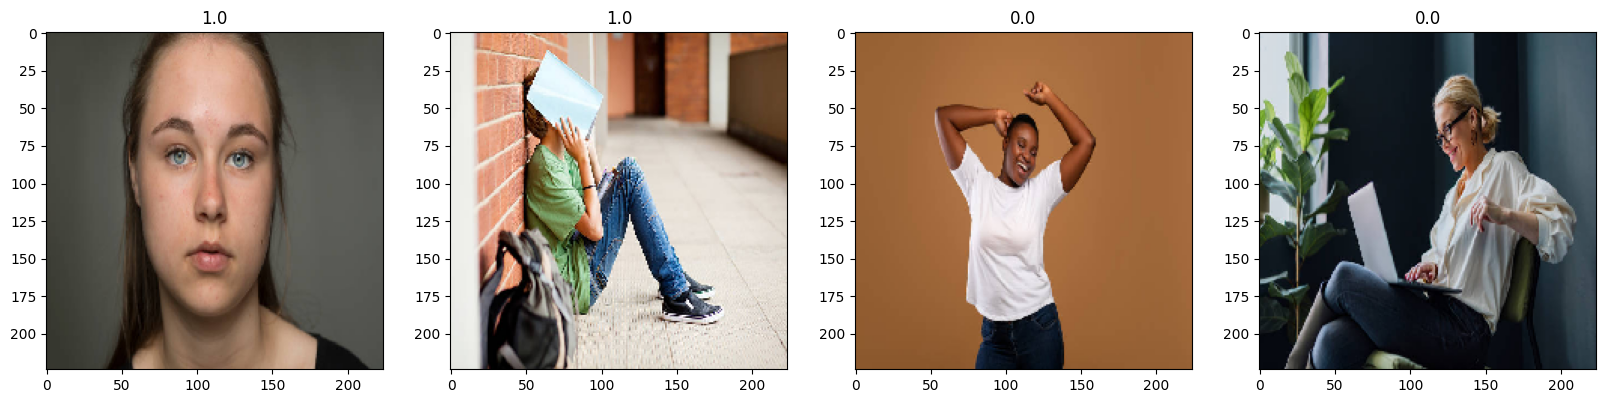

In [24]:
# Let's find out which label is assigned for happy and sad
fig, ax = plt.subplots(ncols=4, figsize=(20, 6))

# Iterate through the first 4 images and corresponding axes
for i, img in enumerate(images[:4]):
    ax[i].imshow(img)
    ax[i].title.set_text(labels[i])  # Hide axes for better visualization

plt.show()

Look's like `0` is for happy and `1` is for sad

# Build a model

## Create the model

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [ ]:
# Create the model (A basic model)
model_1 = Sequential([
    Conv2D(32, 3, activation='relu', input_shape=(224,224,3)),
    MaxPool2D(),

    Conv2D(64, 3, activation='relu'),
    MaxPool2D(),

    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

# COmpile the model
model_1.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the data
history_1 = model_1.fit(train_data,
                        epochs=10,
                        steps_per_epoch=len(train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/10
18/18 [==============================] - 19s 887ms/step - loss: 557.3436 - accuracy: 0.4930 - val_loss: 1.1329 - val_accuracy: 0.5105
Epoch 2/10
18/18 [==============================] - 17s 972ms/step - loss: 0.9987 - accuracy: 0.4947 - val_loss: 1.0004 - val_accuracy: 0.6014
Epoch 3/10
18/18 [==============================] - 13s 757ms/step - loss: 0.7719 - accuracy: 0.5211 - val_loss: 0.8821 - val_accuracy: 0.5245
Epoch 4/10
18/18 [==============================] - 13s 757ms/step - loss: 0.7863 - accuracy: 0.5035 - val_loss: 0.8150 - val_accuracy: 0.5105
Epoch 5/10
18/18 [==============================] - 14s 781ms/step - loss: 0.7293 - accuracy: 0.5440 - val_loss: 0.7045 - val_accuracy: 0.5385
Epoch 6/10
18/18 [==============================] - 14s 759ms/step - loss: 0.7341 - accuracy: 0.4894 - val_loss: 0.6930 - val_accuracy: 0.5524
Epoch 7/10
18/18 [==============================] - 14s 774ms/step - loss: 0.7439 - accuracy: 0.5070 - val_loss: 0.6692 - val_accuracy: 0.51

In [ ]:
# Evaluating the model
model_1.evaluate(test_data)

5/5 [==============================] - 3s 461ms/step - loss: 0.7255 - accuracy: 0.4895


[0.725466787815094, 0.4895104765892029]

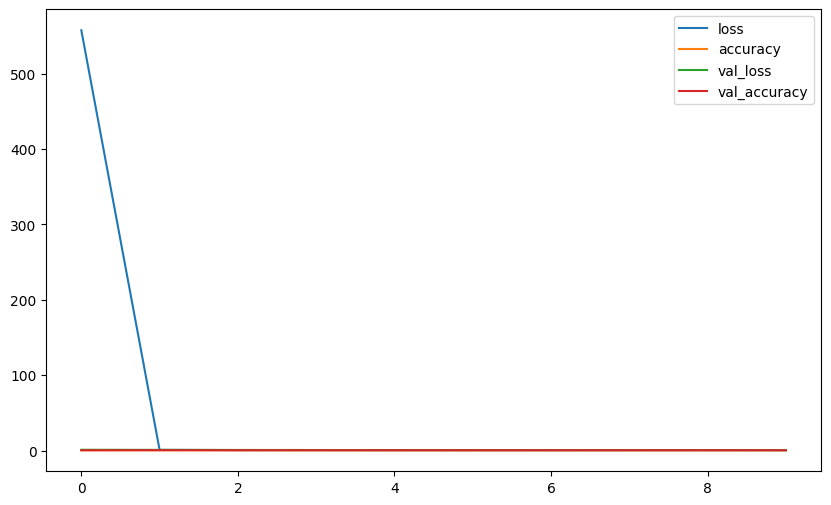

In [ ]:
# Plot loss curves
pd.DataFrame(history_1.history).plot(figsize=(10,6));

## Plotting loss curves
plot the loss and accuracy curves seperately

In [26]:
# Creating a plotting function to use again for plotting the curves seperately
def plot_curves(history):

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  #plot loss
  plt.figure(figsize=(14, 6))
  plt.subplot(1,2,1)
  plt.plot(epochs, loss, label='Training_loss')
  plt.plot(epochs, val_loss, label='Validation_loss')
  plt.title('Loss curves')
  plt.xlabel('Epochs')
  plt.legend()

  # plot accuracy
  plt.subplot(1,2,2)
  plt.plot(epochs, accuracy, label='Training_accuracy')
  plt.plot(epochs, val_accuracy, label='Validation_acccuracy')
  plt.title('Accuracy curves')
  plt.xlabel('Epochs')
  plt.legend();

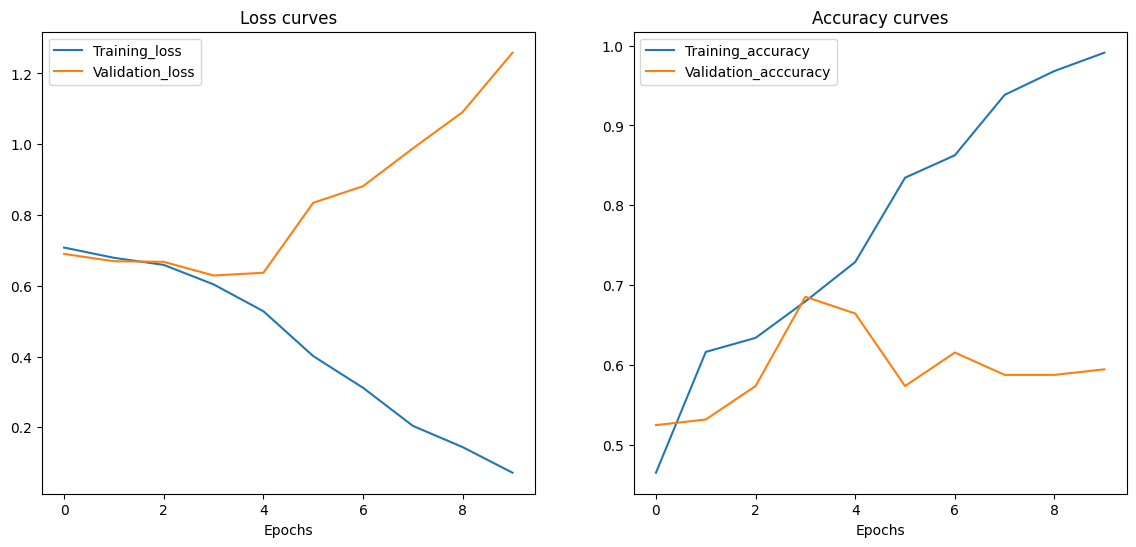

In [ ]:
plot_curves(history_1)

In [ ]:
# Create the model (A basic model)
model_2 = Sequential([
    Conv2D(32, 3, activation='relu', input_shape=(224,224,3)),
    Conv2D(32, 3, activation='relu'),
    MaxPool2D(),

    Conv2D(32, 3, activation='relu'),
    Conv2D(64, 3, activation='relu'),
    MaxPool2D(),

    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model_2.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the data
history_2 = model_2.fit(train_data,
                        epochs=10,
                        steps_per_epoch=len(train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/10
18/18 [==============================] - 21s 878ms/step - loss: 275.5219 - accuracy: 0.4965 - val_loss: 1.5299 - val_accuracy: 0.5175
Epoch 2/10
18/18 [==============================] - 14s 767ms/step - loss: 0.9219 - accuracy: 0.4965 - val_loss: 0.7283 - val_accuracy: 0.4615
Epoch 3/10
18/18 [==============================] - 14s 760ms/step - loss: 0.6824 - accuracy: 0.5070 - val_loss: 0.7105 - val_accuracy: 0.5734
Epoch 4/10
18/18 [==============================] - 14s 780ms/step - loss: 0.6768 - accuracy: 0.5528 - val_loss: 0.6529 - val_accuracy: 0.5594
Epoch 5/10
18/18 [==============================] - 14s 771ms/step - loss: 0.6751 - accuracy: 0.6074 - val_loss: 0.6537 - val_accuracy: 0.5524
Epoch 6/10
18/18 [==============================] - 14s 772ms/step - loss: 0.6688 - accuracy: 0.5511 - val_loss: 0.6630 - val_accuracy: 0.5734
Epoch 7/10
18/18 [==============================] - 14s 775ms/step - loss: 0.6747 - accuracy: 0.5599 - val_loss: 0.6232 - val_accuracy: 0.58

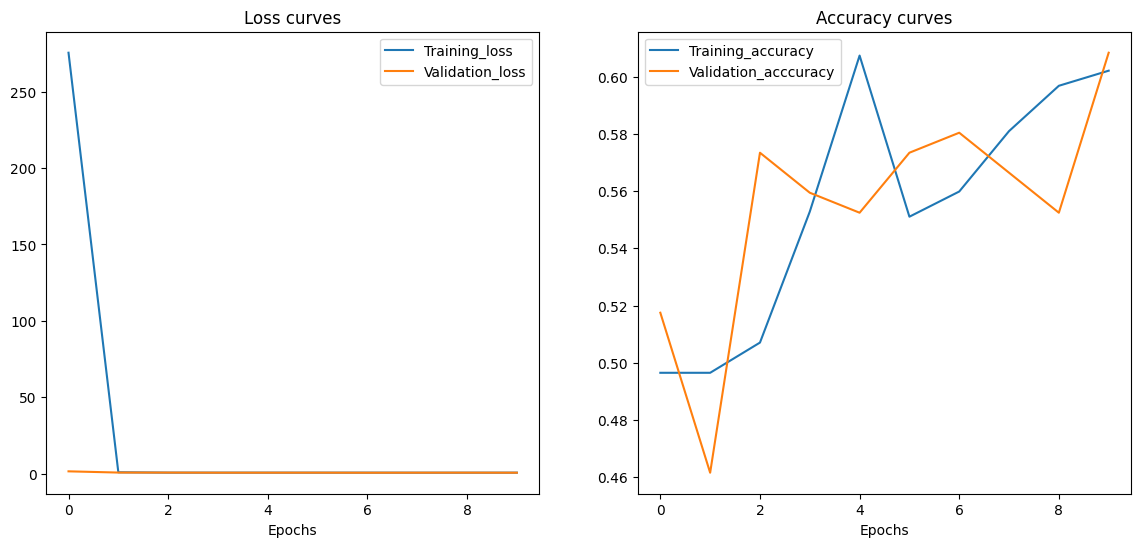

In [ ]:
plot_curves(history_2)

In [ ]:
history_2_2 = model_2.fit(train_data,
                        epochs=10,
                        steps_per_epoch=len(train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/10
18/18 [==============================] - 15s 815ms/step - loss: 0.6670 - accuracy: 0.5898 - val_loss: 0.6349 - val_accuracy: 0.6154
Epoch 2/10
18/18 [==============================] - 14s 774ms/step - loss: 0.6514 - accuracy: 0.6268 - val_loss: 0.6312 - val_accuracy: 0.5874
Epoch 3/10
18/18 [==============================] - 14s 769ms/step - loss: 0.6349 - accuracy: 0.6180 - val_loss: 0.6168 - val_accuracy: 0.6503
Epoch 4/10
18/18 [==============================] - 15s 854ms/step - loss: 0.6419 - accuracy: 0.6320 - val_loss: 0.6299 - val_accuracy: 0.6294
Epoch 5/10
18/18 [==============================] - 18s 993ms/step - loss: 0.6590 - accuracy: 0.6039 - val_loss: 0.6686 - val_accuracy: 0.6014
Epoch 6/10
18/18 [==============================] - 14s 786ms/step - loss: 0.6357 - accuracy: 0.6162 - val_loss: 0.6426 - val_accuracy: 0.5524
Epoch 7/10
18/18 [==============================] - 14s 793ms/step - loss: 0.6486 - accuracy: 0.6162 - val_loss: 0.6332 - val_accuracy: 0.5804

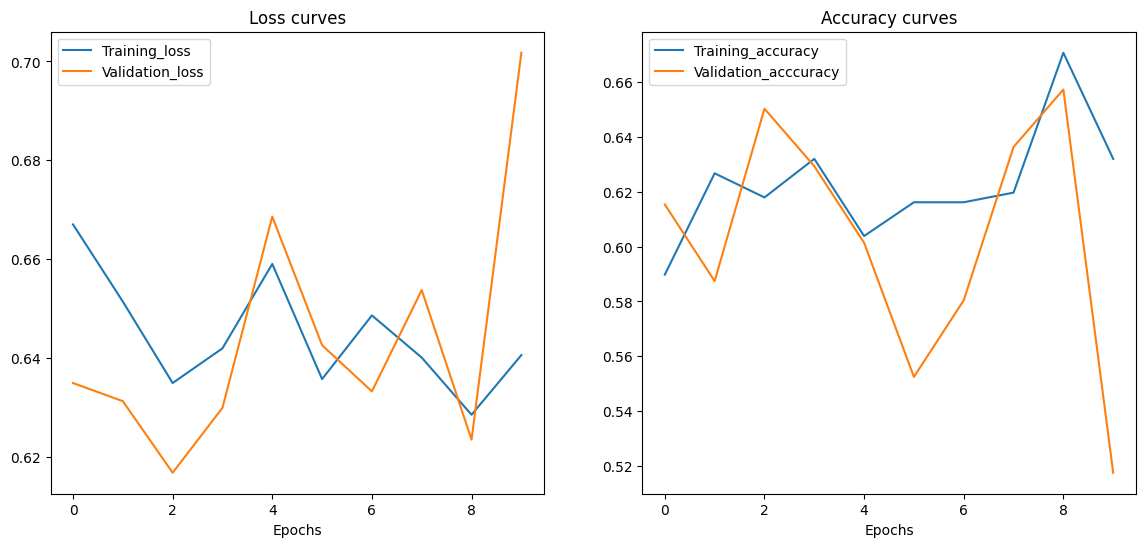

In [ ]:
plot_curves(history_2_2)

In [ ]:
# Initialize the Sequential model
model_3 = Sequential([
    Conv2D(16, (3, 3), 1, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(),
    Conv2D(32, (3, 3), 1, activation="relu"),
    MaxPool2D(),
    Conv2D(16, (3, 3), 1, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(256, activation="relu"),
    Dense(1, activation="sigmoid"),
])

# Compile the model
model_3.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics='accuracy')

# Fit the data
history_3 = model_3.fit(train_data,
                        epochs=10,
                        steps_per_epoch=len(train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/10
18/18 [==============================] - 18s 810ms/step - loss: 63.5832 - accuracy: 0.5194 - val_loss: 0.6894 - val_accuracy: 0.5734
Epoch 2/10
18/18 [==============================] - 13s 745ms/step - loss: 0.7120 - accuracy: 0.5053 - val_loss: 0.6810 - val_accuracy: 0.5315
Epoch 3/10
18/18 [==============================] - 13s 742ms/step - loss: 0.6836 - accuracy: 0.5299 - val_loss: 0.6763 - val_accuracy: 0.5175
Epoch 4/10
18/18 [==============================] - 13s 754ms/step - loss: 0.6818 - accuracy: 0.5141 - val_loss: 0.6878 - val_accuracy: 0.5105
Epoch 5/10
18/18 [==============================] - 13s 744ms/step - loss: 0.6860 - accuracy: 0.5317 - val_loss: 0.6712 - val_accuracy: 0.6084
Epoch 6/10
18/18 [==============================] - 15s 861ms/step - loss: 0.6796 - accuracy: 0.5475 - val_loss: 0.7111 - val_accuracy: 0.4755
Epoch 7/10
18/18 [==============================] - 13s 742ms/step - loss: 0.6842 - accuracy: 0.5511 - val_loss: 0.6642 - val_accuracy: 0.580

# Data augmentation

In [27]:
# Create ImageDataGenerator training instance with data augmentat
train_gen_aug = ImageDataGenerator(rescale=1/255.,
                               rotation_range=20,
                               shear_range=0.3,
                               zoom_range=0.3,
                               width_shift_range=0.2,
                               height_shift_range=0.3,
                               horizontal_flip=True)

# Create ImageDataGenerator training instance without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator test instance without data augmentation
test_datagen = ImageDataGenerator(rescale=1/255.)

In [28]:
# Import data and augment it from training dataframe
print("Augmented training images:")
train_aug = train_gen_aug.flow_from_dataframe(train_df,
                                          x_col='file_path',
                                          y_col='label',
                                          target_size=(224, 224),
                                          batch_size=32,
                                          class_mode='binary',
                                          shuffle=True)


# Create non-augmented data batches
print("Non-augmented training images:")
train_data = train_datagen.flow_from_dataframe(train_df,
                                               x_col='file_path',
                                               y_col = 'label',
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=True)

print("Unchanged test images:")
test_data = test_datagen.flow_from_dataframe(test_df,
                                             x_col='file_path',
                                             y_col = 'label',
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='binary')

Augmented training images:
Found 488 validated image filenames belonging to 2 classes.
Non-augmented training images:
Found 488 validated image filenames belonging to 2 classes.
Unchanged test images:
Found 123 validated image filenames belonging to 2 classes.


In [29]:
# Get the batch samples
images, labels = train_data.next()
aug_images, aug_labels = train_aug.next()

(-0.5, 223.5, 223.5, -0.5)

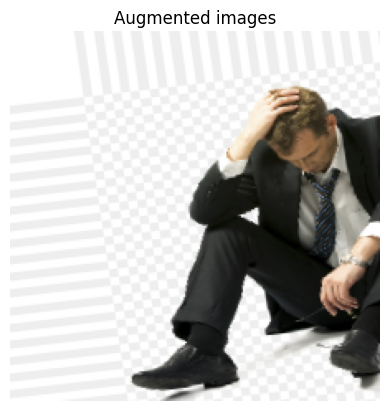

In [34]:
random_number = random.randint(1, 31)
plt.imshow(aug_images[random_number])
plt.title("Augmented images")
plt.axis(False)

In [35]:
# Initialize the Sequential model
model_4 = Sequential([
    Conv2D(16, (3, 3), 1, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(),
    Conv2D(32, (3, 3), 1, activation="relu"),
    MaxPool2D(),
    Conv2D(16, (3, 3), 1, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(256, activation="relu"),
    Dense(1, activation="sigmoid"),
])

# Compile the model
model_4.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics='accuracy')

history_4 = model_4.fit(train_aug,
                        epochs=10,
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/10
16/16 [==============================] - 22s 927ms/step - loss: 0.8695 - accuracy: 0.5143 - val_loss: 0.6897 - val_accuracy: 0.5203
Epoch 2/10
16/16 [==============================] - 15s 954ms/step - loss: 0.6818 - accuracy: 0.5184 - val_loss: 0.6737 - val_accuracy: 0.5366
Epoch 3/10
16/16 [==============================] - 16s 996ms/step - loss: 0.6778 - accuracy: 0.5492 - val_loss: 0.6909 - val_accuracy: 0.5528
Epoch 4/10
16/16 [==============================] - 12s 747ms/step - loss: 0.6927 - accuracy: 0.4939 - val_loss: 0.6929 - val_accuracy: 0.4959
Epoch 5/10
16/16 [==============================] - 11s 712ms/step - loss: 0.6933 - accuracy: 0.4775 - val_loss: 0.6927 - val_accuracy: 0.4959
Epoch 6/10
16/16 [==============================] - 12s 772ms/step - loss: 0.6931 - accuracy: 0.4775 - val_loss: 0.6913 - val_accuracy: 0.5041
Epoch 7/10
16/16 [==============================] - 11s 755ms/step - loss: 0.6910 - accuracy: 0.5266 - val_loss: 0.6881 - val_accuracy: 0.4959

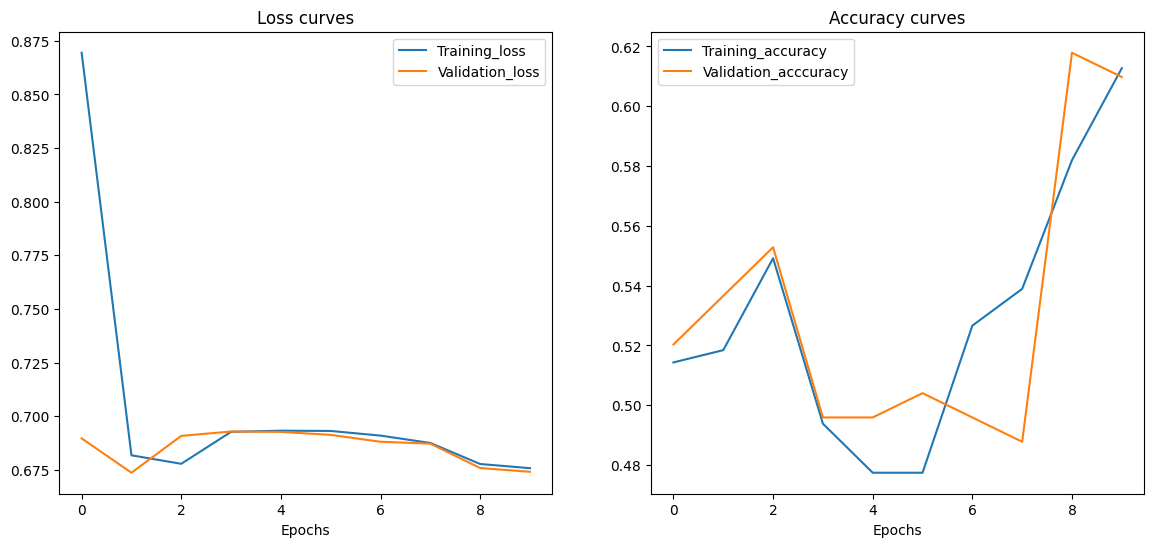

In [49]:
plot_curves(history_4)

In [48]:
model_4.evaluate(test_data)

4/4 [==============================] - 3s 610ms/step - loss: 0.6741 - accuracy: 0.6098


[0.6741107106208801, 0.6097561120986938]

# Making a prediction

Let's try to predict an image on the current model, as this is a practice project i can't able to get higher accuracy for this dataset, later i'll try to improve it when i can.

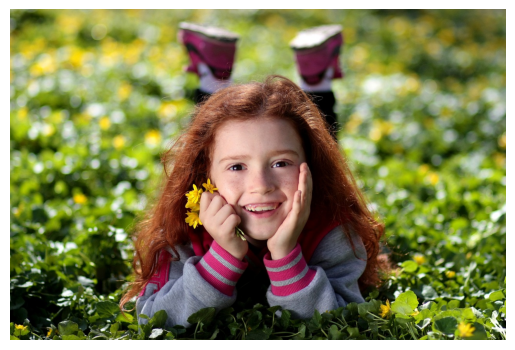

In [38]:
# Load the image and visualize it
img = mpimg.imread("/content/drive/MyDrive/Data/images/happy_2.jpg")
plt.imshow(img)
plt.axis(False);

In [39]:
img.shape

(853, 1280, 3)

In [40]:
def load_and_prep_image(filepath, img_shape=224):

  # Read the image
  img = tf.io.read_file(filepath)

  # Decode the image
  img = tf.image.decode_image(img, channels=3)

  # Resize the image into (224, 224)
  img = tf.image.resize(img, size=(img_shape, img_shape))

  # scale the image
  img = img/255.

  return img

In [41]:
img = load_and_prep_image("/content/drive/MyDrive/Data/images/happy_2.jpg")

In [42]:
def pred_and_plot(model, filename, class_names):

  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred)[0][0])]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

1/1 [==============================] - 0s 433ms/step


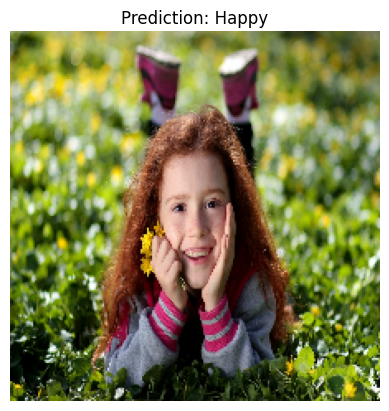

In [43]:
pred_and_plot(model_4, '/content/drive/MyDrive/Data/images/happy_2.jpg', class_names)

1/1 [==============================] - 0s 18ms/step


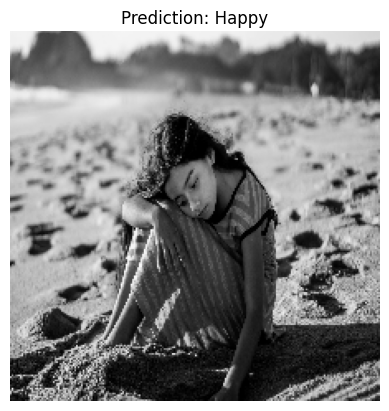

In [44]:
pred_and_plot(model_4, '/content/drive/MyDrive/Data/images/sad_image.jpg', class_names)

1/1 [==============================] - 0s 53ms/step


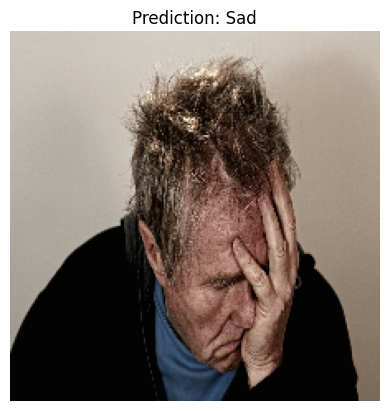

In [45]:
pred_and_plot(model_4, '/content/drive/MyDrive/Data/images/sad_image2.jpg', class_names)

1/1 [==============================] - 0s 18ms/step


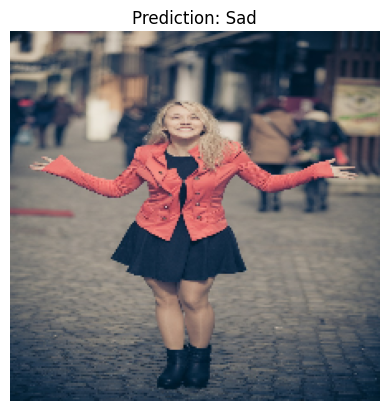

In [46]:
pred_and_plot(model_4, '/content/drive/MyDrive/Data/images/image_happy2.jpg', class_names)

1/1 [==============================] - 0s 19ms/step


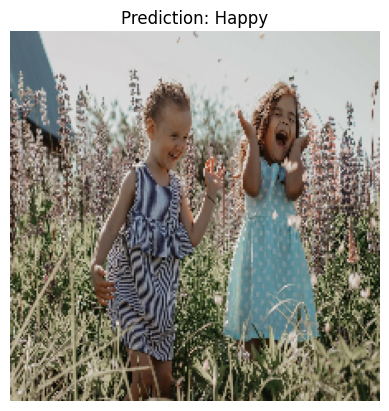

In [47]:
pred_and_plot(model_4, '/content/drive/MyDrive/Data/images/image_happy.jpg', class_names)

Good, for now our model predicted `3` out of `5` images correctly. That's really a progress.., I'll continue to imporve it.